# Aplicando Python para análisis de precios: simulación de escenarios futuros de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

> En la clase anterior vimos como importar datos de activos de la base de datos de Yahoo Finance, tanto descargándolos como archivos separados por comas (.csv), como usando el paquete pandas-datareader. En esta clase, veremos como pronosticar escenarios de evolución de precios, suponiendo que los rendimientos diarios se distribuyen normalmente.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

## 1. Motivación

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 2. Recordemos como descargar datos...

Antes que nada, para poder hacer simular escenarios de predicción de precios, vamos a recordar lo que hicimos en la clase pasada de descargar los datos de Yahoo Finance, utilizando el paquete `data` de la librería `pandas_datareader`.

Esta vez, utilizaremos los datos de precios de cierre ajustados de activos de la compañía Apple en el año 2016 para nuestra aplicación.

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline

In [16]:
# Descargamos datos...
# Instrumento: Apple
ticker = ['AAPL']
# Fuente: Yahoo Finance
data_source = 'yahoo'
# Fechas de interés (inicio y fin): 2016
start_date = '2016-01-04'
end_date = '2016-12-31'
# Función DataReader
panel_data = data.DataReader(ticker, data_source, start_date, end_date)

In [17]:
# Solo nos interesa los precios de cierre ajustados...
closes = panel_data.loc['Adj Close']
# Generamos todos los días del 2016 en orden
all_weekdays = pd.date_range(start_date, end_date)
# Reindizamos
closes = closes.reindex(all_weekdays)
# Llenamos huecos en los precios de cierre
closes = closes.fillna(method='ffill')

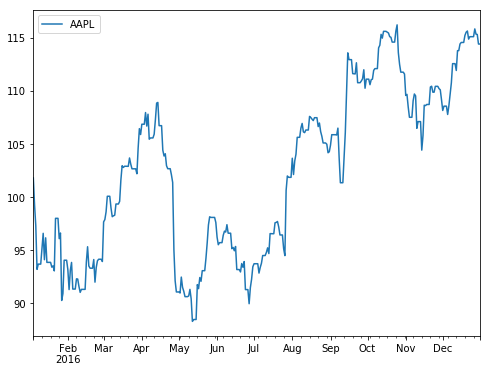

In [20]:
# Graficamos
closes.plot(figsize=(8,6));

## 3. Rendimientos diarios

Los rendimientos diarios se pueden calcular con los precios de cierre de la siguiente manera:

$$r_i=\frac{p_i-p_{i-1}}{p_{i-1}},$$

donde $r_i$ es el rendimiento en el día $i$ y $p_i$ es el precio de cierre ajustado en el día $i$.

**Ver en el pizarrón:** aproximación con logaritmo, además mencionar validez estadística suponiendo distribución lognormal.

Entonces, los rendimientos diarios se pueden calcular como:

In [25]:
# Función para calcular los rendimientos diarios a partir de los precios de cierre...
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1))[1:]

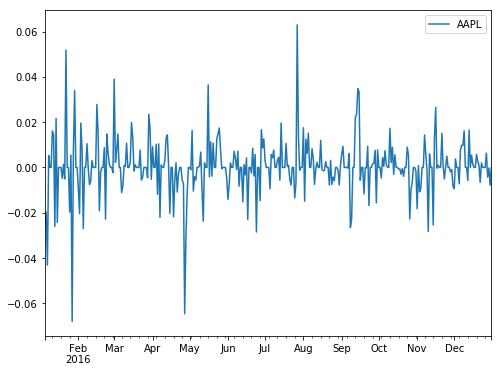

In [28]:
# Calcular rendimientos diarios y graficarlos
daily_returns = calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

Entonces, suponemos que la diferencia logaritmica de los precios (rendimientos diarios) tiene una distribución normal.

¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

In [29]:
mu=daily_returns.mean().AAPL
sigma=daily_returns.std().AAPL
mu, sigma

(0.00032252606319594702, 0.012278733453628314)

## 4. Simulación de varios escenarios

Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos del 2016, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de las acciones en el 2017.

Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones (próxima clase).

Pero, ¿cómo generar vectores de números aleatorios que distribuyen normalmente con una media y varianza dadas?

In [5]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is ret

Generamos un data frame de rendimientos diarios proyectados (10 trayectorias)

In [33]:
ndays = 360
ntraj=10
dates=pd.date_range('20170101',periods=ndays)
simret = pd.DataFrame(sigma*np.random.randn(ndays,ntraj)+mu,index=dates)
simret

,0,1,2,3,4,5,6,7,8,9
2017-01-01,0.001635,-0.009805,-0.017782,0.009676,-0.004888,0.002540,0.008746,0.012359,0.013965,-0.011846
2017-01-02,0.026196,-0.004280,-0.000222,-0.014662,-0.015916,0.003292,0.015374,0.002333,-0.010639,0.022012
2017-01-03,0.001157,0.011639,0.004739,-0.004335,-0.005158,-0.030909,-0.029466,0.003240,0.004610,0.005462
2017-01-04,0.014833,0.011974,0.003052,0.012743,0.011755,0.018015,0.004187,0.002654,0.000491,-0.021645
2017-01-05,-0.009603,-0.029719,0.023247,0.007783,0.007477,0.010282,0.000222,-0.005886,-0.004087,0.020534
2017-01-06,0.004296,0.010370,0.005441,0.021967,0.001707,-0.002056,0.021941,0.004952,-0.002793,0.014643
2017-01-07,-0.001130,0.017210,0.018686,-0.005758,0.012695,-0.026993,-0.004309,-0.003507,0.021019,0.009641
2017-01-08,-0.017076,0.003059,0.006499,-0.004242,0.017326,0.000968,0.003835,-0.011881,-0.016687,-0.004275
2017-01-09,0.013656,0.014024,0.016472,0.013918,-0.012474,0.011353,-0.011358,0.001590,0.006316,0.017131
2017-01-10,0.017973,0.012252,-0.003146,0.000181,0.006700,0.012226,-0.006764,0.003978,0.005186,0.003637


Con los rendimientos, calculamos los precios de cierre... (explicar en el tablero)

In [34]:
simdata=(closes.loc['2016-12-30',:].AAPL)*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2017-01-01,114.583898,113.280617,112.380542,115.508992,113.838944,114.687720,115.401667,115.819331,116.005530,113.049609
2017-01-02,117.625225,112.796831,112.355545,113.827773,112.041371,115.065837,117.189527,116.089826,114.777848,115.565620
2017-01-03,117.761349,114.117323,112.889297,113.335412,111.464991,111.563680,113.786846,116.466586,115.308251,116.198584
2017-01-04,119.521093,115.492011,113.234327,114.788845,112.782940,113.591702,114.264306,116.776120,115.364829,113.710535
2017-01-05,118.378846,112.110228,115.897468,115.685727,113.629372,114.765689,114.289629,116.090813,114.894347,116.069630
2017-01-06,118.888501,113.278886,116.529735,118.255151,113.823533,114.530020,116.824953,116.667111,114.573887,117.781684
2017-01-07,118.754185,115.245287,118.727703,117.576149,115.277680,111.479893,116.322661,116.258629,117.007592,118.922709
2017-01-08,116.743571,115.598358,119.501769,117.078472,117.292441,111.587856,116.769599,114.885484,115.071322,118.415427
2017-01-09,118.348698,117.230916,121.486529,118.719393,115.838434,112.861959,115.450870,115.068355,115.800450,120.461535
2017-01-10,120.494987,118.676055,121.104893,118.740843,116.617167,114.250306,114.672570,115.526976,116.402551,120.900411


Concatenamos y graficamos...

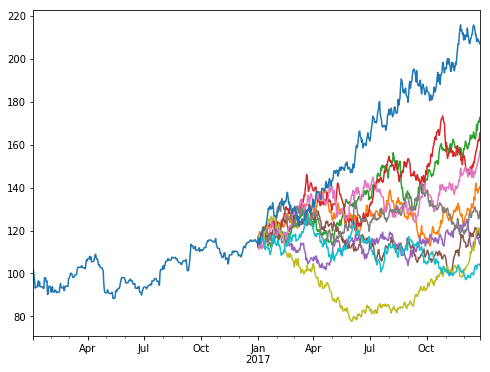

In [35]:
simul=pd.concat([closes.T, simdata.T]).T
simul.plot(figsize=(8,6),legend=False);

___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre ajustados obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (montecarlo).

La próxima clase veremos cómo tomar decisiones estableciendo un umbral de precio.

## Anuncios parroquiales...

1. Viernes 28 de Octubre y Martes 21 de Noviembre no hay clase.
2. Clase de reposición: próximo Miércoles 18 de Octubre de 16:00-18:00, aula D-206 (Clase de repaso).
3. Grupos de proyectos: hoja con integrantes.
4. Para el próximo viernes: proyecto definido, subir a moodle un cuaderno con nombre del proyecto, objetivos y una breve introducción.
5. Les sigo debiendo una tarea de la parte de integración.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>